<a href="https://colab.research.google.com/github/rroszczyk/Python/blob/master/pobieranie_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install selenium
!apt-get update                   # aktualizacja platformy dla prawidłowego działania apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import selenium.webdriver.support.ui as ui
from selenium.webdriver.common.by import By
import time
import sys
import requests
import os
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 7.2 MB/s 
     |████████████████████████████████| 358 kB 47.1 MB/s 
     |████████████████████████████████| 138 kB 43.6 MB/s 
     |████████████████████████████████| 55 kB 4.1 MB/s 
     |████████████████████████████████| 4.0 MB 42.1 MB/s 
     |████████████████████████████████| 58 kB 3.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Hit:1 https://d

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
def pobierzPlik(url, nazwaPliku):
    req = requests.get(url, stream=True)
    with open(nazwaPliku, 'wb') as uchwytPliku:
        for chunk in req.iter_content():
            uchwytPliku.write(chunk)

In [3]:
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


In [9]:
browser.get('https://www.diki.pl/slownik-angielskiego?q=python')
links = browser.find_elements(By.XPATH, './/span[@class = "audioIcon icon-sound dontprint soundOnClick"]')
pictures = browser.find_elements(By.XPATH, '//img[@class = "pict"]')

pliki = []
for l in links:
  nazwa = l.get_attribute("data-audio-url")
  pobierzPlik("https://www.diki.pl/"+nazwa, os.path.basename(nazwa))
  pliki.append(os.path.basename(nazwa))
  print(nazwa)

obrazy = []
for p in pictures:
  nazwa = p.get_attribute("src")
  pobierzPlik(nazwa, os.path.basename(nazwa.split("/")[-1]))
  obrazy.append(os.path.basename(nazwa.split("/")[-1]))
  print(nazwa)

/images-common/en/mp3/python.mp3
/images-common/en/mp3/python.mp3
/images-common/en/mp3/monty_python.mp3
/images-common/en/mp3/python.mp3
/images-common/en/mp3/monty_python.mp3
https://www.diki.pl/images-common/words/python.jpg


(101, 120, 3)
Rozmiar obrazu: 12120 pikseli


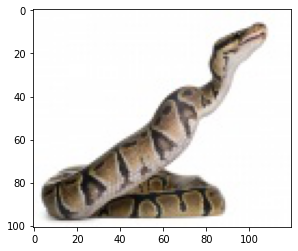

In [10]:
for obraz in obrazy:
  painting = plt.imread(obraz)
  print(painting.shape)
  print(f"Rozmiar obrazu: {painting.shape[0] * painting.shape[1]} pikseli")
  plt.imshow(painting);

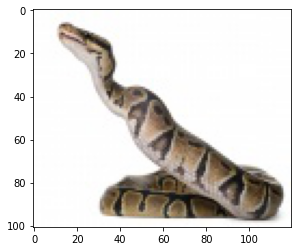

In [ ]:
plt.imshow(painting[:,::-1])  # lustrzane odbicie ostatniego obrazu

(-0.5, 119.5, 100.5, -0.5)

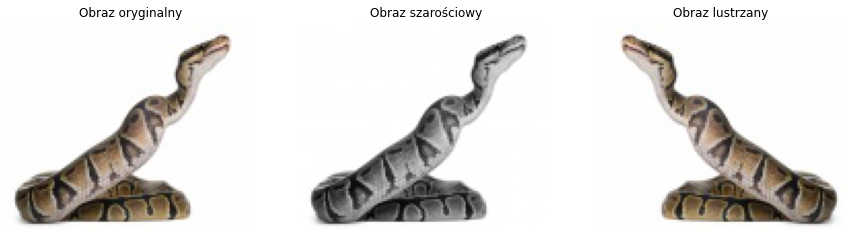

In [ ]:
def rgb2grayM(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray    

fig, axes = plt.subplots(ncols=3, figsize=(15, 15))

ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(painting, cmap=plt.get_cmap('gray'))
ax[0].set_title('Obraz oryginalny')
ax[0].axis('off')

ax[1].imshow(rgb2gray(painting), cmap=plt.get_cmap('gray'))
ax[1].set_title('Obraz szarościowy')
ax[1].axis('off')

ax[2].imshow(painting[:,::-1], cmap=plt.get_cmap('gray'))
ax[2].set_title('Obraz lustrzany')
ax[2].axis('off')
